# LOF (Local Outlier Factor) 알고리즘

- LOF (Local Outlier Factor) 알고리즘은 이웃과 관련하여 주어진 데이터 포인트의 로컬 밀도 편차를 계산하는 비지도 학습 이상 탐지 방법입니다.

- 이웃 보다 밀도가 상당히 낮은 샘플을 특이치로 간주합니다.  


- LOF가 이상치 감지에 사용되는 경우에는 predict 메소드가 없습니다. 


- 고려되는 neighbor 수 (파라미터 n_neighbors)는 일반적으로  

    1) 클러스터에 포함해야하는 최소 샘플 수보다 크게 설정되어 다른 샘플이 이 클러스터에 상대적인 로컬 이상치가 될 수 있도록 하고,    
    2) 잠재적 로컬 이상치가 될 수 있는 샘플 수보다 크게 설정됩니다.  
    
    neighbor 를 몇개로 하는지 정해진 것은 없으며 n_neighbors = 20을 사용하면 일반적으로 잘 작동하는 것으로 보입니다.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, \
                            recall_score, confusion_matrix, \
                            classification_report
import seaborn as sns
import time

from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN

## Toy Data 생성

In [13]:
np.random.seed(42)

# train data 생성
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.vstack([X_inliers + 2, X_inliers - 2])
print(X_inliers.shape)

(200, 2)


In [15]:
# some outliers 생성
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.vstack([X_inliers, X_outliers])
print(X.shape)

(220, 2)


In [19]:
n_outliers = len(X_outliers)
# inlier 1, outlier -1 부여
ground_truth = np.ones(len(X), dtype=int)
ground_truth[-n_outliers:] = -1

print(ground_truth.shape)
# 이상치 비율
print("{:.2f}".format(len(X_outliers) / len(X)))

(220,)
0.09


In [20]:
ground_truth

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

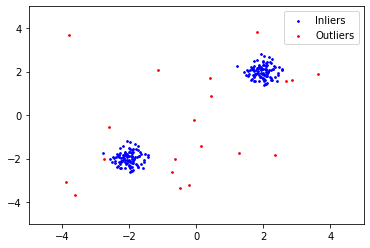

In [21]:
plt.scatter(X_inliers[:, 0], X_inliers[:, 1], color='b', s=3., label='Inliers')
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], color='r', s=3., label='Outliers')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend()

## LOF Model Train

n_neighbors : int, default=20  
contamination : 데이터 세트의 이상치 비율. 피팅할 때 샘플 점수에 대한 임계값을 정의하는 데 사용. float 인 경우 오염은 [0, 0.5] 범위에 있어야합니다.

In [22]:
# fit the model for outlier detection (default)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
lof

LocalOutlierFactor(contamination=0.1)

- LOF가 outlier 탐지에 사용될 때 `fit_predict`를 사용하여 훈련 샘플의 예측된 레이블을 계산합니다.  
- estimator는 `predict`이 없습니다.

In [18]:
y_pred_lof = lof.fit_predict(X)
y_pred_lof

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,
       -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

negative_outlier_factor_ :  

    - Inliers 의 LOF score 는 -1 에 가깝고, outliers 는 LOF score 가 크다. 

In [27]:
n_errors = (y_pred_lof != ground_truth).sum()
print(n_errors)

X_scores = lof.negative_outlier_factor_
print(X_scores.shape)

8
(220,)


In [30]:
# inlier 로 분류
X_scores[y_pred_lof == 1][:20]

array([-0.99994411, -1.14405944, -0.97422441, -1.29043229, -0.96406015,
       -0.967451  , -1.16897405, -1.17786476, -1.01083896, -1.14511932,
       -1.21255557, -1.05066867, -0.96961357, -1.02846721, -0.96108146,
       -1.30563699, -1.01782283, -1.09341031, -1.20053   , -1.048392  ])

In [31]:
# outlier 로 분류
X_scores[y_pred_lof == -1]

array([-1.87981613, -1.66221208, -1.93321727, -1.48850217, -1.69275528,
       -2.34464971, -2.07471657, -3.41600941, -5.79017284, -1.75216951,
       -8.1179078 , -3.93211812, -6.8671737 , -5.60730006, -5.28475732,
       -6.61647574, -7.06687309, -5.75753448, -6.284507  , -6.35571743,
       -6.88230317, -4.8455449 ])

In [34]:
X_scores.max(), X_scores.min(), X_scores.max() - X_scores.min()

(-0.9418576387466737, -8.117907800916395, 7.176050162169721)

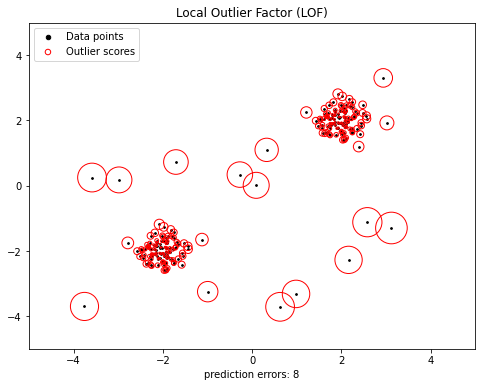

In [41]:
plt.figure(figsize=(8, 6))

plt.title("Local Outlier Factor (LOF)")
plt.scatter(X[:, 0], X[:, 1], color='k', s=3., label='Data points')

# 반지름이 outlier score에 비례하는 circle 플로팅
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())

plt.scatter(X[:, 0], X[:, 1], s=1000 * radius, edgecolors='r',
            facecolors='none', label='Outlier scores')

plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [20]
legend.legendHandles[1]._sizes = [30]
plt.show()

In [42]:
print(classification_report(ground_truth, y_pred_lof))

              precision    recall  f1-score   support

          -1       0.77      0.85      0.81        20
           1       0.98      0.97      0.98       200

    accuracy                           0.96       220
   macro avg       0.88      0.91      0.89       220
weighted avg       0.97      0.96      0.96       220



# DBSCAN

- 노이즈가있는 애플리케이션의 밀도 기반 공간 클러스터링   


- 고밀도의 핵심 샘플을 찾아서 클러스터를 확장합니다. 밀도가 비슷한 클러스터를 포함하는 데이터에 적합합니다.  


- eps : float, default=0.5 $\rightarrow$ 가장 중요한 DBSCAN 매개 변수. 다른 샘플과 인접하는 것으로 간주될 두 sample 사이의 최대 거리


- min_samplesint, default=5  
    핵심 포인트로 간주 할 포인트에 대한 이웃의 샘플 수 (또는 총 가중치)입니다. 여기에는 포인트 자체가 포함됩니다.  
    
    
- core_sample_indices : core sample 의 index  

- labels_ : 데이터 세트의 각 point에 대한 클러스터 레이블. outlier 에는 -1 이 지정.

In [57]:
epsilon = 0.3
minSamples = 7

db = DBSCAN(eps=epsilon, min_samples=minSamples).fit(X)

labels = db.labels_

print(labels.shape)
print(labels)
print()
print(db.core_sample_indices_.shape)
print(db.core_sample_indices_[:20])

(220,)
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1 -1  0 -1  0 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1]

(199,)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [58]:
unique_labels = set(labels)       # -1 : outlier
unique_labels

{-1, 0, 1}

In [59]:
print("predicted as outlier : {}".format(sum(labels == -1)))

predicted as outlier : 19


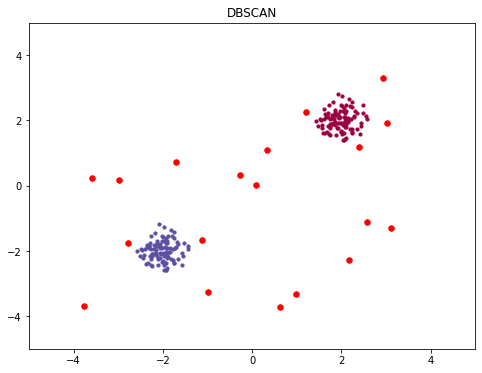

In [60]:
colors = plt.cm.Spectral(np.linspace(0, 10, len(unique_labels)))

plt.figure(figsize=(8, 6))

for k, col in zip(unique_labels, colors):
    members = (labels == k)
    if k == -1:
        plt.scatter(X[members, 0], X[members, 1], color='r', 
                    marker='o', s=30)
    else:
        plt.scatter(X[members, 0], X[members, 1], color=col,
                    marker='o', s=10)

plt.title('DBSCAN')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.show()

In [61]:
y_pred_db = labels
y_pred_db[y_pred_db == 0] = 1

print(classification_report(ground_truth, y_pred_db))

              precision    recall  f1-score   support

          -1       0.89      0.85      0.87        20
           1       0.99      0.99      0.99       200

    accuracy                           0.98       220
   macro avg       0.94      0.92      0.93       220
weighted avg       0.98      0.98      0.98       220



# Isolation Forest 알고리즘

- 이상을 감지하는 최신 기술 중 하나는 Isolation Forest 입니다. 이 알고리즘은 anomaly data가 few and different 데이터 포인트라는 사실을 기반으로 합니다. 이러한 속성의 결과로 anomaly data는 isolation 이라는 메커니즘에 영향을 받기 쉽습니다.  

- 이 방법은 매우 유용하며 기존의 모든 방법과 근본적으로 다릅니다. 일반적으로 사용되는 기본 거리 및 밀도 측정 보다 이상을 감지하는 더 효과적이고 효율적인 수단으로 isolation을 사용합니다. 또한 이 방법은 선형 시간 복잡도가 낮고 메모리 요구 사항이 적은 알고리즘입니다. 데이터 세트의 크기에 관계없이 고정 크기의 작은 하위 샘플을 사용하여 적은 수의 트리로 우수한 성능의 모델을 구축합니다.

- IsolationForest는 feature를 무작위로 선택한 다음 선택한 feature의 최대값과 최소값 사이의 분할 값을 무작위로 선택하여 관측치를 isolate 합니다.

- 재귀 분할은 트리 구조로 나타낼 수 있으므로 샘플을 분리하는 데 필요한 분할 수는 루트 노드에서 종료 노드까지의 경로 길이와 동일합니다.

- 이러한 random tree forest에서 평균을 낸 경로 길이는 정상성 판단과 결정 기능의 척도입니다.

- 랜덤 파티셔닝은 anomaly에 대해 더 짧은 경로를 생성합니다. 따라서 random tree forest가 집합적으로 특정 샘플에 대해 더 짧은 경로 길이를 생성하면 anomaly일 가능성이 높습니다.

- 일반적인 기계 학습 방법은 학습하려는 패턴이 균형을 이룰 때 더 잘 작동하는 경향이 있습니다.


### 격리 포리스트의 작동 방식

- Isolation Forest 알고리즘은 feature를 무작위로 선택한 다음 선택한 feature의 최대값과 최소값 사이의 분할 값을 무작위로 선택하여 관측치를 분리합니다. 

- Isolation forest는 기본적으로 데이터셋을 의사결정나무(Decision Tree) 형태로 표현해 정상값을 분리하기 위해서는 의사결정나무를 깊숙하게 타고 내려가야 하고, 반대로 이상값은 의사결정나무 상단부에서 분리할 수 있다는 것을 이용합니다. 이 특성을 사용해 의사결정나무를 몇 회 타고 내려가야 분리되는가를 기준으로 정상과 이상을 분리합니다.

- 알고리즘이 분리를 구성하는 방법은 먼저 isolation tree 또는 random decision tree 를 만드는 것입니다. 그런 다음 sample을 분리하기 위한 path의 길이로 score 를 계산합니다.

- Isolation forest의 장점

    - 군집기반 이상탐지 알고리즘에 비해 계산량이 매우 적다   
    - 강건한(Robust)한 모델을 만들 수 있다
    

In [62]:
isof = IsolationForest(random_state=0).fit(X)

y_pred_isof = isof.predict(X)  # 1: inlier, -1: outlier

print("predicted as outlier : {}".format(sum(y_pred_isof == -1)))

predicted as outlier : 22


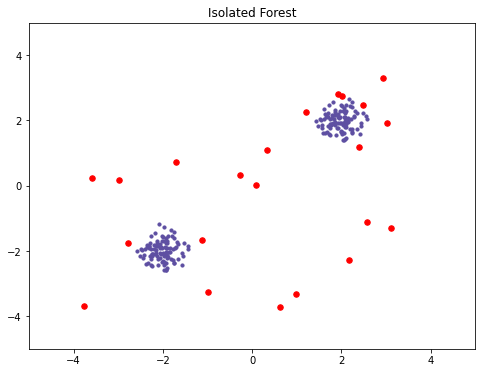

In [63]:
plt.figure(figsize=(8, 6))

for i in [-1, 1]:
    members = (y_pred_isof == i)
    if i == -1:
        plt.scatter(X[members, 0], X[members, 1], color='r', marker='o', s=30)
    else:
        plt.scatter(X[members, 0], X[members, 1], color=col, marker='o', s=10)

plt.title('Isolated Forest')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.show()

## Models 비교

In [64]:
predictions = {"lof": y_pred_lof, "isof": y_pred_isof, 
               "dbscan": y_pred_db}

lof: 8
Accuracy Score : 0.96364
Precision Score: 0.98485
Recall Score   : 0.97500



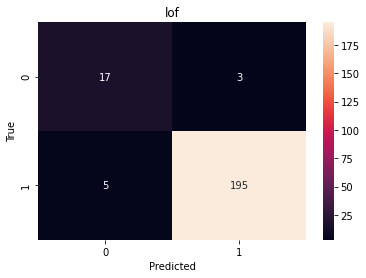

isof: 6
Accuracy Score : 0.97273
Precision Score: 0.98990
Recall Score   : 0.98000



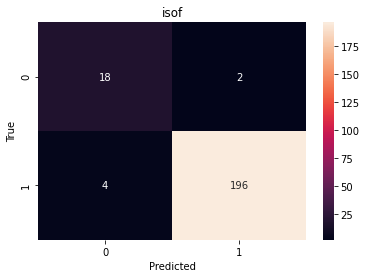

dbscan: 5
Accuracy Score : 0.97727
Precision Score: 0.98507
Recall Score   : 0.99000



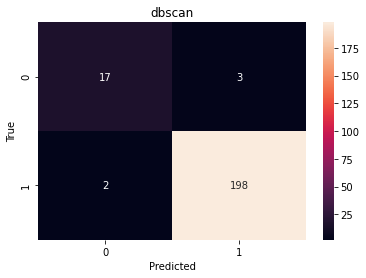

In [65]:
y = ground_truth

for clf_name, y_pred in predictions.items():
    
    n_errors = (y_pred != ground_truth).sum()
    
    # Run Classification Metrics
    print(f"{clf_name}: {n_errors}")
    print(f"Accuracy Score : {accuracy_score(y, y_pred):.5f}")
    print(f"Precision Score: {precision_score(y, y_pred):.5f}")
    print(f"Recall Score   : {recall_score(y, y_pred):.5f}")
    print()

    cm = confusion_matrix(y, y_pred)
    plt.figure()
    ax = sns.heatmap(cm, annot=True, fmt='d')
    ax.set_title(clf_name)
    ax.set_ylabel('True')
    ax.set_xlabel('Predicted')
    plt.show()